# Comparison of GLIF models for my implementation and that in Teeter et al. (2018)


## Generate Neural Response for Teeter et al. (2018) - Figure 1b

In [10]:
import numpy as np
import pickle
import os
import allensdk.core.json_utilities as ju
from allensdk.model.glif.glif_neuron import GlifNeuron
import sys
import time
import matplotlib.pyplot as plt

relative_path=os.path.dirname('./GLIF_Teeter_et_al_2018/create_data_dir')
sys.path.append(os.path.join(relative_path, 'libraries'))
from data_library import get_file_path_endswith, get_sweep_num_by_name
from allensdk.core.cell_types_cache import CellTypesCache
ctc = CellTypesCache(manifest_file=os.path.join(relative_path,'cell_types_manifest.json'))

#---------------------------------------------------------------
#------------NO SPECIFICATIONS NEEDED---------------------------
#---------------------------------------------------------------

def get_model(path, EW):
    '''Runs the model for a specified neuron and model
    inputs:
        path: string
            folder path with files for the neuron
        EW: string
            end of file searching for:  options '_GLIF1_neuron_config.json',_GLIF2_neuron_config.json' etc.
    returns:
        run_data: dictionary
            contains data from the model run
            
   '''

    specimen_id=int(os.path.basename(path)[:9])
    file=get_file_path_endswith(path, EW)

    # load data
    dir_name=os.path.join(relative_path, 'mouse_nwb/specimen_'+ str(specimen_id))
    all_sweeps=ctc.get_ephys_sweeps(specimen_id,  os.path.join(dir_name, 'ephys_sweeps.json'))
    #all_sweeps=ctc.get_ephys_sweeps(specimen_id)
    sweeps=get_sweep_num_by_name(all_sweeps, 'Noise 2')
    
    noise2_sweeps = get_sweep_num_by_name(all_sweeps, 'Noise 2')
#    noise2_data=ctc.get_ephys_data(specimen_id).get_sweep(noise2_sweeps[0])
    noise2_data=ctc.get_ephys_data(specimen_id, os.path.join(dir_name, 'ephys.nwb')).get_sweep(noise2_sweeps[0])

    # run model with current
    stimulus2=noise2_data['stimulus']
    neuron_config=ju.read(file)
    neuron_config['dt']=1./noise2_data['sampling_rate'] #reset dt to the stimulus dt not the optimization dt
    neuron = GlifNeuron.from_dict(neuron_config)
    1/noise2_data['sampling_rate']
    run_data = neuron.run(stimulus2)
    run_data['time']=np.arange(0, len(run_data['voltage']))*neuron_config['dt']
    run_data['El_reference']=neuron_config['El_reference']    
    run_data['stimulus']=noise2_data['stimulus']

    return run_data, file

# def make_and_save_models(specimen_id):
#     '''Runs models and creates resulting voltage waveforms and saves them to a pickle file
#     inputs:
#         specimen_id: integer
#             specifies neuron to be run
#     outputs:
#         pickle files
#     '''
    
#     global start_time #grab start_time from outside this module
    
#     # finding the folder associated with the desired specimen_id 
#     for dir in folders:
#         sp_id=int(os.path.basename(dir)[:9])
#         if sp_id == specimen_id:
#             folder=dir
#     cre=os.path.basename(folder)[10:]
    
#     try:
#         os.makedirs('pkl_data')
#     except: pass
    
#     print('running LIF')
#     LIF_model=get_model(folder, '_GLIF1_neuron_config.json')
#     pickle.dump(LIF_model, open("pkl_data/"+str(specimen_id)+cre+"_LIF_model.pkl", "wb" ))
#     print('GLIF1 done at',(time.time()-start_time)/60., 'min')

#     # print('running LIFR')
#     # LIFR_model=get_model(folder, '_GLIF2_neuron_config.json')
#     # pickle.dump(LIFR_model, open("pkl_data/"+str(specimen_id)+cre+"_LIFR_model.pkl", "wb" ))
#     # print('GLIF2 done at',(time.time()-start_time)/60., 'min')

#     # print('running LIFASC')
#     # LIFASC_model=get_model(folder, '_GLIF3_neuron_config.json')
#     # pickle.dump(LIFASC_model, open("pkl_data/"+str(specimen_id)+cre+"_LIFASC_model.pkl", "wb" ))
#     # print('GLIF3 done at',(time.time()-start_time)/60., 'min')

#     # print('running LIFRASC')
#     # LIFRASC_model=get_model(folder, '_GLIF4_neuron_config.json')
#     # pickle.dump(LIFRASC_model, open("pkl_data/"+str(specimen_id)+cre+"_LIFRASC_model.pkl", "wb" ))
#     # print('GLIF4 done at',(time.time()-start_time)/60., 'min')
    
#     # print('running LIFRASCAT')
#     # LIFRASCAT_model=get_model(folder, '_GLIF5_neuron_config.json')
#     # pickle.dump(LIFRASCAT_model, open("pkl_data/"+str(specimen_id)+cre+"_LIFRASCAT_model.pkl", "wb" ))
#     # print('GLIF5 done at',(time.time()-start_time)/60., 'min')

    return filename
path=os.path.join(relative_path,'mouse_struc_data_dir')
folders=[os.path.join(path, f) for f in  os.listdir(path)]

start_time=time.time()


#--make and save models
specimen_id=474637203
# make_and_save_models(specimen_id)

# specimen_id=512322162
# make_and_save_models(specimen_id)

# specimen_id=512322162

# finding the folder associated with the desired specimen_id 
import matplotlib.pyplot as plt
for dir in folders:
    sp_id=int(os.path.basename(dir)[:9])
    if sp_id == specimen_id:
        folder=dir
cre=os.path.basename(folder)[10:]

try:
    os.makedirs('pkl_data')
except: pass


path = folder
EW = '_GLIF1_neuron_config.json'
specimen_id=int(os.path.basename(path)[:9])
file=get_file_path_endswith(path, EW)

# load data
dir_name=os.path.join(relative_path, 'mouse_nwb/specimen_'+ str(specimen_id))
all_sweeps=ctc.get_ephys_sweeps(specimen_id,  os.path.join(dir_name, 'ephys_sweeps.json'))
#all_sweeps=ctc.get_ephys_sweeps(specimen_id)
sweeps=get_sweep_num_by_name(all_sweeps, 'Noise 2')

noise2_sweeps = get_sweep_num_by_name(all_sweeps, 'Noise 2')
#    noise2_data=ctc.get_ephys_data(specimen_id).get_sweep(noise2_sweeps[0])
noise2_data=ctc.get_ephys_data(specimen_id, os.path.join(dir_name, 'ephys.nwb')).get_sweep(noise2_sweeps[0])

# run model with current
stimulus2=noise2_data['stimulus']
neuron_config=ju.read(file)
neuron_config['dt']=1./noise2_data['sampling_rate'] #reset dt to the stimulus dt not the optimization dt
neuron = GlifNeuron.from_dict(neuron_config)
1/noise2_data['sampling_rate']
run_data = neuron.run(stimulus2)
run_data['time']=np.arange(0, len(run_data['voltage']))*neuron_config['dt']
run_data['El_reference']=neuron_config['El_reference']    
run_data['stimulus']=noise2_data['stimulus']
LIF_model = run_data

print('running LIF')
# LIF_model=get_model(folder, '_GLIF1_neuron_config.json')
pickle.dump(LIF_model, open("pkl_data/"+str(specimen_id)+cre+"_LIF_model.pkl", "wb" ))
print('GLIF1 done at',(time.time()-start_time)/60., 'min')

# print('running LIFR')
# LIFR_model=get_model(folder, '_GLIF2_neuron_config.json')
# pickle.dump(LIFR_model, open("pkl_data/"+str(specimen_id)+cre+"_LIFR_model.pkl", "wb" ))
# print('GLIF2 done at',(time.time()-start_time)/60., 'min')

# print('running LIFASC')
# LIFASC_model=get_model(folder, '_GLIF3_neuron_config.json')
# pickle.dump(LIFASC_model, open("pkl_data/"+str(specimen_id)+cre+"_LIFASC_model.pkl", "wb" ))
# print('GLIF3 done at',(time.time()-start_time)/60., 'min')

# print('running LIFRASC')
# LIFRASC_model=get_model(folder, '_GLIF4_neuron_config.json')
# pickle.dump(LIFRASC_model, open("pkl_data/"+str(specimen_id)+cre+"_LIFRASC_model.pkl", "wb" ))
# print('GLIF4 done at',(time.time()-start_time)/60., 'min')

# print('running LIFRASCAT')
# LIFRASCAT_model=get_model(folder, '_GLIF5_neuron_config.json')
# pickle.dump(LIFRASCAT_model, open("pkl_data/"+str(specimen_id)+cre+"_LIFRASCAT_model.pkl", "wb" ))
# print('GLIF5 done at',(time.time()-start_time)/60., 'min')



running LIF
GLIF1 done at 2.7304546515146892 min


In [37]:
run_data

{'voltage': array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        5.48122028e-311, 5.48122028e-311, 5.48122028e-311]),
 'threshold': array([0.04617742, 0.04617742, 0.04617742, ..., 0.04617742, 0.04617742,
        0.04617742]),
 'AScurrents': array([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]]),
 'grid_spike_times': array([10.305875, 10.511555, 10.56991 , 11.305875, 11.511555, 11.56991 ,
        12.305875, 12.511555, 12.56991 , 18.07268 , 18.093325, 18.23403 ,
        18.250055, 18.272545, 18.28413 , 18.294105, 18.30251 , 18.308535,
        18.314965, 18.32396 , 18.33605 , 18.34733 , 18.362265, 18.369945,
        18.37783 , 18.38886 , 18.39819 , 18.410575, 18.420835, 18.43951 ,
        18.46532 , 18.47584 , 18.485985, 18.495325, 18.50284 , 18.510585,
        18.51667 , 18.524845, 18.53464 , 18.544675, 18.55292 , 18.561925,
        18.569065, 18.57534 , 18.613935, 18.62577 , 18.640085, 18.64953 ,
       

## Key variables are Voltage and Stimulus (external input current)

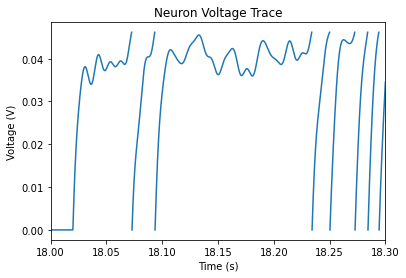

In [12]:
V = LIF_model['voltage']
t = LIF_model['time']
S = LIF_model['stimulus']

fig, ax = plt.subplots()
ax.plot(t, V)
ax.set_xlim(18,18.3)
ax.set_ylabel('Voltage (V)')
ax.set_xlabel('Time (s)')
ax.set_title('Neuron Voltage Trace')
plt.show()

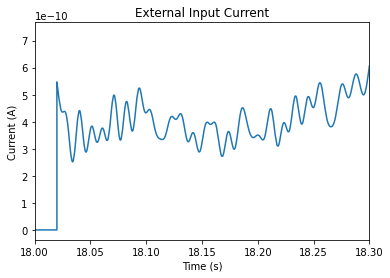

In [13]:
fig, ax = plt.subplots()
ax.plot(t, S)
ax.set_xlim(18,18.3)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current (A)')  # Check unit
ax.set_title('External Input Current')
plt.show()

In [17]:
mask = np.logical_and(t>18, t<18.3)
S_sub = S[mask]


In [16]:
from pathlib import Path
import json
# config = Path('.',folder+ '_GLIF1_neuron_config.json').resolve()

with open(filename) as f:
    config_dict = json.load(f)


In [17]:
config_dict

{'El_reference': -0.06692888132731122,
 'C': 5.974122556127248e-11,
 'asc_amp_array': [-1.209661945253461e-11, -2.2298404030276979e-10],
 'init_threshold': 0.02500695720882018,
 'threshold_reset_method': {'params': {}, 'name': 'inf'},
 'th_inf': 0.02500695720882018,
 'spike_cut_length': 56,
 'init_AScurrents': [0.0, 0.0],
 'init_voltage': 0.0,
 'threshold_dynamics_method': {'params': {}, 'name': 'inf'},
 'voltage_reset_method': {'params': {}, 'name': 'zero'},
 'extrapolation_method_name': 'endpoints',
 'dt': 5e-05,
 'voltage_dynamics_method': {'params': {}, 'name': 'linear_forward_euler'},
 'El': 0.0,
 'asc_tau_array': [0.3333333333333333, 0.01],
 'R_input': 111019003.43890007,
 'AScurrent_dynamics_method': {'params': {}, 'name': 'none'},
 'AScurrent_reset_method': {'params': {}, 'name': 'none'},
 'dt_multiplier': 10,
 'th_adapt': None,
 'coeffs': {'a': 1,
  'C': 1,
  'b': 1,
  'G': 1,
  'th_inf': 1.8465829511239957,
  'asc_amp_array': [1.0, 1.0]},
 'type': 'GLIF'}

In [ ]:
unit_conversions = {
    'C': 1e9,
    'G': 1e6,
    'El': 1e3,
    'V_thres': 1e3
}

allen_to_pygenn_names = {
    'C': 'C',
    'El' : 'El',
    'th_inf': 'V_thres',

}

In [15]:
import json

filename = './GLIF_Teeter_et_al_2018/mouse_struc_data_dir/474637203_Htr3a-Cre_NO152/474637203_Htr3a-Cre_NO152_GLIF1_neuron_config.json'

with open(filename) as f:
    config = json.load(f)
config

{'El_reference': -0.06692888132731122,
 'C': 5.974122556127248e-11,
 'asc_amp_array': [-1.209661945253461e-11, -2.2298404030276979e-10],
 'init_threshold': 0.02500695720882018,
 'threshold_reset_method': {'params': {}, 'name': 'inf'},
 'th_inf': 0.02500695720882018,
 'spike_cut_length': 56,
 'init_AScurrents': [0.0, 0.0],
 'init_voltage': 0.0,
 'threshold_dynamics_method': {'params': {}, 'name': 'inf'},
 'voltage_reset_method': {'params': {}, 'name': 'zero'},
 'extrapolation_method_name': 'endpoints',
 'dt': 5e-05,
 'voltage_dynamics_method': {'params': {}, 'name': 'linear_forward_euler'},
 'El': 0.0,
 'asc_tau_array': [0.3333333333333333, 0.01],
 'R_input': 111019003.43890007,
 'AScurrent_dynamics_method': {'params': {}, 'name': 'none'},
 'AScurrent_reset_method': {'params': {}, 'name': 'none'},
 'dt_multiplier': 10,
 'th_adapt': None,
 'coeffs': {'a': 1,
  'C': 1,
  'b': 1,
  'G': 1,
  'th_inf': 1.8465829511239957,
  'asc_amp_array': [1.0, 1.0]},
 'type': 'GLIF'}

In [16]:
#GLIF_1 equation
return voltage_t0 + (inj + np.sum(AScurrents_t0) - neuron.G * neuron.coeffs['G'] * (voltage_t0 - neuron.El)) * neuron.dt / (neuron.C * neuron.coeffs['C'])
1/$(C)*($(Isyn)-$(G)*($(V)-$(El)))*DT;

SyntaxError: 'return' outside function (707415265.py, line 2)

In [ ]:
print(neuron.G * 1e6)
print(units_dict['G'])

0.009007466911287449


NameError: name 'units_dict' is not defined

In [ ]:
# Units check
#1/(nF) * (nA - uS * (mV - mV)) * ms
#nA / nF * ms - uS * (mV) * ms / nF 
# A/F * ms - mV * S * s / F

# Left side checks out:
# A / F * ms = A / (kg−1⋅m−2⋅s4⋅A2) * ms
# A / F * ms = 1 / (kg-1*m-2*s4*A) * ms
# A / F * ms = kg * m2 * s-4 * A-1 * ms
# A / F * ms = kg * m2 * s-3 * A-1 * 1e-3
# A / F * ms = mV

# Right side checks out:
# mV * S * s / F = (kg * m2 * s-3 * A-1 * 1e-3) * kg−1⋅m−2⋅s3⋅A2 * s / (kg−1⋅m−2⋅s4⋅A2)
# mV * S * s / F = (1e-3) / (kg−1⋅m−2⋅s3⋅A)
# mV * S * s / F = mV

## Apply same external input current to my GLIF 

In [39]:
print(config['th_inf'] * config['coeffs']['th_inf'])
print(run_data['threshold'])

0.04617742084129465
[0.04617742 0.04617742 0.04617742 ... 0.04617742 0.04617742 0.04617742]


swig/python detected a memory leak of type 'CodeGenerator::SingleThreadedCPU::Backend *', no destructor found.


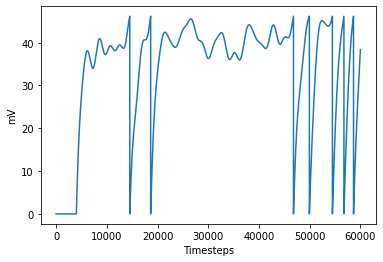

In [40]:
# from GLIF_models import GLIF_1
from pygenn.genn_model import GeNNModel, create_custom_current_source_class, create_custom_neuron_class
from pygenn.genn_groups import CurrentSource
import matplotlib.pyplot as plt
from pathlib import Path 

GLIF_1 = create_custom_neuron_class(
    "GLIF_1",
    param_names = ["C", "G", "El", "V_thres"],
    var_name_types=[("V", "scalar")],
    sim_code='$(V)+=1/$(C)*($(Isyn)-$(G)*($(V)-$(El)))*DT;',
    threshold_condition_code='$(V)>=$(V_thres)',
    reset_code = '$(V)=$(El);',
)

# Convert Allen Units (SI) to PyGenn
units_dict = {
    'C': config['C'] * 1e9,  # F -> nF
    'G': 1 / config['R_input'] * 1e6,  # S -> uS
    'El': config['El'] * 1e3, # V -> mV
    'V_thres': config['th_inf'] * config['coeffs']['th_inf'] * 1e3, # V -> mV
    'dT' : neuron.dt * 1e3,  # s -> ms
    'V': config['init_voltage'] * 1e3,  # V -> mV
}

### Add GLIF Class to model ###
GLIF_1_params = {k:units_dict[k] for k in GLIF_1.get_param_names()}
GLIF_1_init = {k:units_dict[k] for k in ['V']}
num_GLIF = 1
model = GeNNModel("float", "GLIF_1")
model.dT=units_dict['dT']
pop1 = model.add_neuron_population(
    pop_name = "pop1",
    num_neurons = num_GLIF,
    neuron = GLIF_1,
    param_space = GLIF_1_params,
    var_space = GLIF_1_init,
)

### Add current source to model ###
#TODO: Change step to reference the time
external_current_source = create_custom_current_source_class(
    class_name = "external_current",
    var_name_types = [("current", "float") ],  
    injection_code = """
    $(current)=$(Ie)[int($(t) / DT)];
    $(injectCurrent,$(current) );
    """,
    extra_global_params=[("Ie", "float*")]
)
cs_ini = {"current":0.0}  # external input current from Teeter 2018
cs = model.add_current_source(
    cs_name = "external_current_source", 
    current_source_model=external_current_source,
    pop = pop1,
    param_space = {},
    var_space = cs_ini)

scale = 1e9  # amps -> nanoamps
cs.set_extra_global_param("Ie", S_sub*scale)


model.build()
model.load()

# Run a quick simulation
num_steps = len(S_sub)
v = np.empty((num_steps, num_GLIF))
# c = np.empty((2000, num_GLIF))
v_view = pop1.vars["V"].view
# c_view = cs.vars["current"].view
for i in range(num_steps):
    model.step_time()
    pop1.pull_var_from_device("V")
    # cs.pull_var_from_device("current")
    
    v[model.timestep - 1,:]=v_view[:]
    # c[model.timestep - 1,:]=c_view[:]
# Plot the results -- voltage of the neuron for 200 timesteps
fig, axis = plt.subplots()
axis.plot(v[:num_steps,:])
axis.set_xlabel('Timesteps')
axis.set_ylabel('mV')
plt.show()

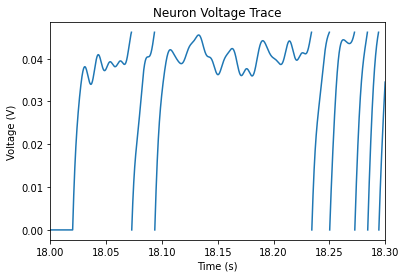

In [41]:
V = LIF_model['voltage']
t = LIF_model['time']
S = LIF_model['stimulus']

fig, ax = plt.subplots()
ax.plot(t, V)
ax.set_xlim(18,18.3)
ax.set_ylabel('Voltage (V)')
ax.set_xlabel('Time (s)')
ax.set_title('Neuron Voltage Trace')
plt.show()

In [ ]:


# ### Add current source to model ###
# external_current_source = create_custom_current_source_class(
#     class_name = "external_current",
#     var_name_types = [("step", "unsigned int") ],  # How to index array?
#     injection_code = """
#     $(injectCurrent, $(current_array)[$(step)]);
#     $(step)++;
#     """,
# )
# cs_ini = {"step": 0, "current_array": S}  # external input current from Teeter 2018
# model.add_current_source(
#     cs_name = "external_current_source", 
#     current_source_model=external_current_source,
#     pop = pop1,
#     param_space = {},
#     var_space = cs_ini)
# # pop.set_extra_global_param("input",numpy_array)
# # Global implies same for all neuron
# # extra_global_params = [("current_array", "float*")]
# #extra global parameter=[("R", "float")]
# # float* means its an array you can give a size for
# # Can access time with $(T)
# # $(input)[$(id)*$(max_t)+(int)($(t) / DT)] 

# model.build()
# model.load()

# # Run a quick simulation
# v = np.empty((2000, num_GLIF))
# v_view = pop1.vars["V"].view
# while model.t < 200.0:
#     model.step_time()
#     pop1.pull_var_from_device("V")
    
#     v[model.timestep - 1,:]=v_view[:]
    
# # Plot the results -- voltage of the neuron for 200 timesteps
# fig, axis = plt.subplots()
# axis.plot(v[:2000,:])
# axis.set_xlabel('Timesteps')
# axis.set_ylabel('mV')
# plt.show()

# ### Add current source to model ###
# external_current_source = create_custom_current_source_class(
#     class_name = "external_current",
#     var_name_types = [("step", "unsigned int") ],  # How to index array?
#     injection_code = """
#     $(injectCurrent, $(current_array)[$(step)]);
#     $(step)++;
#     """,
# )
# cs_ini = {"step": 0, "current_array": S}  # external input current from Teeter 2018
# model.add_current_source(
#     cs_name = "external_current_source", 
#     current_source_model=external_current_source,
#     pop = pop1,
#     param_space = {},
#     var_space = cs_ini)
# # pop.set_extra_global_param("input",numpy_array)
# # Global implies same for all neuron
# # extra_global_params = [("current_array", "float*")]
# #extra global parameter=[("R", "float")]
# # float* means its an array you can give a size for
# # Can access time with $(T)
# # $(input)[$(id)*$(max_t)+(int)($(t) / DT)] 

# model.build()
# model.load()

# # Run a quick simulation
# v = np.empty((2000, num_GLIF))
# v_view = pop1.vars["V"].view
# while model.t < 200.0:
#     model.step_time()
#     pop1.pull_var_from_device("V")
    
#     v[model.timestep - 1,:]=v_view[:]
    
# # Plot the results -- voltage of the neuron for 200 timesteps
# fig, axis = plt.subplots()
# axis.plot(v[:2000,:])
# axis.set_xlabel('Timesteps')
# axis.set_ylabel('mV')
# plt.show()